In [2]:
!pip3 install tensorflow

In [3]:
!pip3 install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118


Looking in indexes: https://download.pytorch.org/whl/cu118


In [4]:
# Import biblioteki numpy z aliasem 'np'.
# Biblioteka ta jest podstawą do obliczeń naukowych w Pythonie, oferuje wsparcie dla dużych,
# wielowymiarowych tablic i macierzy, wraz z kolekcją funkcji matematycznych do operowania na tych tablicach.
import numpy as np

# Import funkcji 'randint' z modułu 'random'.
# Funkcja ta generuje losową liczbę całkowitą w określonym zakresie, co jest przydatne w losowaniu, symulacjach,
# oraz innych zastosowaniach, gdzie potrzebne są losowe wartości całkowite.
from random import randint

# Import funkcji 'shuffle' z modułu 'sklearn.utils'.
# Funkcja ta losowo miesza kolekcje lub tablice. Jest szczególnie użyteczna w uczeniu maszynowym do mieszania danych
# przed podziałem na zestawy treningowe i testowe, aby usunąć wszelkie błędy, które mogłyby być wprowadzone przez kolejność danych.
from sklearn.utils import shuffle

# Import klasy 'MinMaxScaler' z modułu 'sklearn.preprocessing'.
# Klasa ta skaluje i transformuje cechy do określonego zakresu, zazwyczaj od 0 do 1, lub tak, aby minimalna i maksymalna
# wartość każdej cechy była skalowana do danego zakresu. Normalizacja ta może poprawić wydajność wielu algorytmów uczenia maszynowego.
from sklearn.preprocessing import MinMaxScaler


In [5]:
train_samples = []
train_labels =[] # 1 - chory, 0 - zdrowy

In [6]:
for i in range(50):
  # 5% młodych, którzy doświadczyli skutków ubocznych
  random_younger = randint(13,64)
  train_samples.append(random_younger)
  train_labels.append(1)

  random_older = randint(65, 100)
  train_samples.append(random_older)
  train_labels.append(0)

for i in range(1000):
    random_younger = randint(13,64)
    train_samples.append(random_younger)
    train_labels.append(0)

    random_older = randint(65, 100)
    train_samples.append(random_older)
    train_labels.append(1)


In [7]:
print(train_samples)

[16, 90, 57, 95, 21, 85, 61, 93, 22, 68, 58, 94, 49, 74, 19, 84, 19, 78, 16, 71, 20, 82, 41, 67, 29, 85, 57, 88, 56, 81, 38, 73, 47, 68, 16, 76, 55, 92, 55, 97, 38, 68, 31, 93, 36, 73, 44, 65, 62, 86, 35, 80, 35, 96, 13, 68, 52, 93, 32, 71, 30, 83, 18, 100, 31, 69, 13, 68, 46, 73, 47, 85, 13, 69, 21, 89, 14, 66, 59, 92, 31, 70, 13, 76, 52, 74, 25, 81, 57, 82, 54, 96, 45, 84, 18, 70, 37, 83, 45, 80, 26, 92, 46, 83, 19, 99, 64, 88, 60, 66, 53, 97, 18, 91, 18, 81, 13, 77, 39, 72, 38, 95, 25, 89, 26, 80, 21, 75, 64, 74, 52, 72, 17, 83, 42, 96, 32, 89, 28, 83, 37, 78, 53, 71, 47, 82, 39, 84, 14, 92, 63, 96, 57, 93, 31, 79, 50, 79, 43, 96, 43, 93, 55, 93, 64, 93, 64, 92, 40, 85, 42, 73, 34, 84, 17, 97, 35, 83, 17, 83, 57, 77, 51, 65, 45, 97, 53, 79, 23, 92, 53, 76, 52, 96, 28, 81, 55, 99, 22, 86, 46, 69, 42, 85, 58, 70, 25, 94, 44, 86, 13, 95, 18, 100, 13, 89, 36, 96, 42, 99, 48, 90, 15, 98, 52, 67, 30, 76, 28, 66, 53, 74, 35, 93, 13, 92, 38, 68, 44, 73, 19, 95, 50, 81, 25, 72, 46, 81, 57, 7

In [8]:
print(train_labels)

[1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 

In [9]:
train_samples = np.array(train_samples)
train_labels = np.array(train_labels)

In [10]:
print(train_samples)
print(train_labels)


[16 90 57 ... 82 17 99]
[1 0 1 ... 1 0 1]


In [11]:
train_samples, train_labels = shuffle(train_samples, train_labels)

In [12]:
print(train_samples)
print(train_labels)


[91 66 78 ... 43 35 27]
[1 1 1 ... 0 0 0]


In [13]:
scalar = MinMaxScaler(feature_range=(0,1))

In [14]:
scaled_train_samples = scalar.fit_transform(train_samples.reshape(-1,1))

In [15]:
print(scaled_train_samples)

[[0.89655172]
 [0.6091954 ]
 [0.74712644]
 ...
 [0.34482759]
 [0.25287356]
 [0.16091954]]


tworzenie modelu

In [16]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy

In [17]:

# Wylistowanie dostępnych fizycznych urządzeń typu GPU za pomocą TensorFlow.

# Ta funkcja pozwala na zidentyfikowanie wszystkich dostępnych GPU w systemie, co jest przydatne, gdy chcemy skonfigurować TensorFlow

# do korzystania z określonych urządzeń sprzętowych.

physical_devices = tf.config.experimental.list_physical_devices('GPU')

# Sprawdzanie, czy jakiekolwiek GPU są dostępne

if physical_devices:

    # Jeśli GPU są dostępne, ustaw wzrost pamięci na pierwszym dostępnym GPU.

    # Wzrost pamięci oznacza, że TensorFlow nie zajmie całej dostępnej pamięci na GPU od razu, ale będzie zwiększał jej użycie

    # w miarę potrzeby. Jest to przydatne, aby uniknąć konfliktów z innymi procesami, które mogą potrzebować GPU.

    tf.config.experimental.set_memory_growth(physical_devices[0], True)

    # Wypisanie liczby dostępnych GPU.

    print("Num GPUs Available: ", len(physical_devices))

else:

    # Jeśli nie ma dostępnych GPU, również wypisanie tej informacji.

    print("Num GPUs Available: ", len(physical_devices))

Num GPUs Available:  1


In [18]:
model = Sequential(
    [
        Input(shape=(1,)),
        Dense(units=16, activation='relu'),
        Dense(units=32, activation='relu'),
        Dense(units=2, activation='softmax'),
    ]


)

In [19]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 16)                  │              32 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │             544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 642 (2.51 KB)

 Trainable params: 642 (2.51 KB)

 Non-trainable params: 0 (0.00 B)

In [20]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [21]:
!pip install --upgrade tensorflow


In [22]:
model.fit(x=scaled_train_samples, y=train_labels, batch_size=10, epochs=30, shuffle=True, verbose=2)

Epoch 1/30
210/210 - 3s - 13ms/step - accuracy: 0.4981 - loss: 0.6912
Epoch 2/30
210/210 - 1s - 6ms/step - accuracy: 0.6381 - loss: 0.6697
Epoch 3/30
210/210 - 1s - 4ms/step - accuracy: 0.7062 - loss: 0.6506
Epoch 4/30
210/210 - 1s - 7ms/step - accuracy: 0.7486 - loss: 0.6284
Epoch 5/30
210/210 - 1s - 5ms/step - accuracy: 0.7905 - loss: 0.6024
Epoch 6/30
210/210 - 1s - 3ms/step - accuracy: 0.8119 - loss: 0.5733
Epoch 7/30
210/210 - 1s - 3ms/step - accuracy: 0.8348 - loss: 0.5415
Epoch 8/30
210/210 - 0s - 2ms/step - accuracy: 0.8505 - loss: 0.5089
Epoch 9/30
210/210 - 1s - 3ms/step - accuracy: 0.8676 - loss: 0.4772
Epoch 10/30
210/210 - 0s - 2ms/step - accuracy: 0.8743 - loss: 0.4469
Epoch 11/30
210/210 - 0s - 1ms/step - accuracy: 0.8848 - loss: 0.4192
Epoch 12/30
210/210 - 1s - 3ms/step - accuracy: 0.8948 - loss: 0.3948
Epoch 13/30
210/210 - 1s - 3ms/step - accuracy: 0.8971 - loss: 0.3734
Epoch 14/30
210/210 - 0s - 2ms/step - accuracy: 0.9100 - loss: 0.3553
Epoch 15/30
210/210 - 1s - 3

In [23]:
model.fit(x=scaled_train_samples, y=train_labels, validation_split=0.1, batch_size=10, epochs=30, shuffle=True, verbose=2)


Epoch 1/30
189/189 - 1s - 8ms/step - accuracy: 0.9312 - loss: 0.2663 - val_accuracy: 0.9714 - val_loss: 0.1962
Epoch 2/30
189/189 - 1s - 6ms/step - accuracy: 0.9312 - loss: 0.2650 - val_accuracy: 0.9714 - val_loss: 0.1947
Epoch 3/30
189/189 - 1s - 5ms/step - accuracy: 0.9312 - loss: 0.2642 - val_accuracy: 0.9714 - val_loss: 0.1931
Epoch 4/30
189/189 - 1s - 5ms/step - accuracy: 0.9312 - loss: 0.2630 - val_accuracy: 0.9714 - val_loss: 0.1921
Epoch 5/30
189/189 - 0s - 2ms/step - accuracy: 0.9312 - loss: 0.2621 - val_accuracy: 0.9714 - val_loss: 0.1905
Epoch 6/30
189/189 - 1s - 3ms/step - accuracy: 0.9312 - loss: 0.2612 - val_accuracy: 0.9714 - val_loss: 0.1885
Epoch 7/30
189/189 - 0s - 2ms/step - accuracy: 0.9328 - loss: 0.2602 - val_accuracy: 0.9714 - val_loss: 0.1875
Epoch 8/30
189/189 - 0s - 2ms/step - accuracy: 0.9323 - loss: 0.2595 - val_accuracy: 0.9714 - val_loss: 0.1863
Epoch 9/30
189/189 - 0s - 2ms/step - accuracy: 0.9312 - loss: 0.2587 - val_accuracy: 0.9714 - val_loss: 0.1851
E

In [24]:
predictions = model.predict(x=scaled_train_samples, batch_size=10, verbose=0)

In [25]:
print(predictions)

[[0.02972825 0.97027177]
 [0.3669943  0.6330057 ]
 [0.08360312 0.91639686]
 ...
 [0.96049654 0.0395035 ]
 [0.9643456  0.03565442]
 [0.964523   0.03547705]]


In [26]:
for i in predictions:
  print(i)


[0.02972825 0.97027177]
[0.3669943 0.6330057]
[0.08360312 0.91639686]
[0.09026223 0.90973777]
[0.04825078 0.9517492 ]
[0.95773023 0.04226979]
[0.9643456  0.03565442]
[0.07160904 0.9283909 ]
[0.8574979  0.14250219]
[0.02740053 0.97259945]
[0.28187644 0.71812356]
[0.28187644 0.71812356]
[0.02740053 0.97259945]
[0.96436775 0.03563218]
[0.05657093 0.94342905]
[0.9644344  0.03556562]
[0.07739349 0.9226065 ]
[0.03224717 0.9677528 ]
[0.96336967 0.03663028]
[0.07160904 0.9283909 ]
[0.15248379 0.84751624]
[0.24412544 0.7558746 ]
[0.03791763 0.9620824 ]
[0.96348166 0.03651839]
[0.04825078 0.9517492 ]
[0.9643233  0.03567663]
[0.9594291  0.04057094]
[0.08360312 0.91639686]
[0.8320303  0.16796966]
[0.96265805 0.03734195]
[0.11364787 0.88635206]
[0.02143201 0.978568  ]
[0.95520246 0.04479754]
[0.9643011  0.03569889]
[0.01419089 0.98580915]
[0.07160904 0.9283909 ]
[0.5584678 0.4415322]
[0.65135187 0.34864816]
[0.04825078 0.9517492 ]
[0.96181667 0.03818337]
[0.95520246 0.04479754]
[0.20995241 0.790047

In [27]:
rounded_predictions = np.argmax(predictions, axis=-1)

In [28]:
for i in rounded_predictions:
  print(i)

1
1
1
1
1
0
0
1
0
1
1
1
1
0
1
0
1
1
0
1
1
1
1
0
1
0
0
1
0
0
1
1
0
0
1
1
0
0
1
0
0
1
0
0
1
0
1
0
0
1
1
0
0
1
1
1
1
0
0
0
1
1
0
0
1
1
0
1
1
1
0
1
0
1
0
0
0
1
1
1
1
1
0
1
0
1
1
1
0
1
0
0
1
1
1
0
0
1
0
0
0
0
1
1
1
1
0
1
0
0
1
0
1
1
1
1
0
1
1
0
0
1
0
1
1
0
0
0
0
1
0
1
0
1
0
0
0
1
1
0
1
0
0
1
1
0
0
1
0
1
1
1
1
1
1
0
0
1
0
0
0
0
0
1
0
1
1
1
0
0
1
0
1
0
1
1
0
1
0
1
1
0
1
0
0
0
0
1
1
0
1
0
1
0
0
0
1
1
1
1
1
0
0
0
1
1
0
0
1
0
1
1
1
0
1
0
0
0
1
0
0
0
1
1
1
0
0
0
0
1
1
1
1
1
1
1
1
0
0
0
1
0
1
0
1
1
0
0
1
1
0
0
0
0
1
0
0
0
1
0
1
1
0
0
1
0
0
1
1
0
1
1
1
0
1
0
1
0
0
1
1
0
1
0
0
0
0
0
0
0
0
1
0
1
1
0
0
0
0
1
0
1
0
0
1
0
1
1
1
0
0
1
1
1
0
0
1
0
1
1
1
0
1
0
0
0
1
1
0
1
1
0
1
0
1
1
1
1
1
1
0
0
0
1
1
0
1
0
1
1
0
1
1
1
0
0
1
1
0
0
0
0
1
0
1
0
0
0
0
0
1
1
1
0
0
0
1
0
1
0
1
1
1
1
1
1
1
0
1
1
0
0
0
0
1
1
0
0
0
0
0
1
1
0
0
0
1
1
1
1
0
0
1
1
0
1
0
0
0
1
1
1
1
0
0
1
1
1
0
1
1
1
1
0
1
0
1
0
1
1
0
1
1
0
0
0
1
1
1
0
1
1
1
0
0
0
1
0
1
1
0
1
1
0
1
1
0
1
1
0
1
1
1
1
0
1
1
1
1
1
1
0
1
0
0
1
1
1
1
0
1
0
1
1
1
0
0
1
0
1


In [29]:
# Włączenie integracji matplotlib z notatnikiem Jupyter, pozwalające na wyświetlanie wykresów bezpośrednio pod komórkami kodu.
%matplotlib inline

# Importowanie funkcji confusion_matrix z modułu sklearn.metrics.
# Confusion matrix (macierz błędów) to narzędzie do oceny wydajności modelu klasyfikacyjnego,
# prezentujące liczby predykcji dla każdej klasy w stosunku do rzeczywistych etykiet.
from sklearn.metrics import confusion_matrix

# Importowanie modułu itertools, który oferuje różne funkcje pomocnicze optymalizujące
# iteracyjne zadania (takie jak produkty kartezjańskie, permutacje, kombinacje itp.).
import itertools

# Importowanie biblioteki matplotlib.pyplot jako plt.
# Matplotlib to biblioteka do tworzenia statycznych, interaktywnych wykresów i wizualizacji w Pythonie.
import matplotlib.pyplot as plt

# Obliczanie macierzy błędów na podstawie rzeczywistych etykiet i przewidzianych przez model.
# 'y_true' to rzeczywiste etykiety, a 'rounded_predictions' to etykiety przewidziane przez model.
# Wynik, 'cm', jest dwuwymiarową tablicą, gdzie indeksy wierszy oznaczają rzeczywiste klasy,
# a indeksy kolumn wskazują przewidywane klasy.
cm = confusion_matrix(y_true=train_labels, y_pred=rounded_predictions)

In [30]:
# Definicja funkcji plot_confusion_matrix z parametrami: macierz błędów (cm), lista nazw klas, flaga normalizacji,
# tytuł wykresu i mapa kolorów.
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Macierz pomyłek',
                          cmap=plt.cm.Blues):

    # Wieloliniowy komentarz dokumentujący funkcję, opisujący jej działanie i parametry.
    """
    To funkcja drukuje i wyświetla macierz pomyłek.
    Normalizację można zastosować, ustawiając normalize=True.
    """

    # Wyświetlenie macierzy pomyłek jako obrazu z wykorzystaniem mapy kolorów cmap.
    plt.imshow(cm, interpolation='nearest', cmap=cmap)

    # Ustawienie tytułu wykresu.
    plt.title(title)

    # Dodanie paska kolorów (colorbar), który pokazuje zakres wartości reprezentowanych przez kolory na mapie.
    plt.colorbar()

    # Ustalenie pozycji, na których mają być wyświetlane etykiety (tutaj dla klas).
    tick_marks = np.arange(len(classes))

    # Ustawienie etykiet osi X z nazwami klas, obrót etykiet o 45 stopni dla lepszej czytelności.
    plt.xticks(tick_marks, classes, rotation=45)

    # Ustawienie etykiet osi Y z nazwami klas.
    plt.yticks(tick_marks, classes)

    # Warunek sprawdzający, czy użytkownik chce znormalizować macierz pomyłek.
    if normalize:
        # Normalizacja wartości macierzy pomyłek, dzielenie każdego wiersza przez sumę wartości w wierszu,
        # przekształcając liczby w prawdopodobieństwa.
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        # Wydrukowanie informacji o normalizacji.
        print("Znormalizowana macierz pomyłek")
    else:
        # Wydrukowanie informacji, że macierz nie jest normalizowana.
        print('Macierz pomyłek, bez normalizacji')

    # Wydrukowanie wartości macierzy pomyłek w konsoli.
    print(cm)

    # Ustalenie progu dla decyzji o kolorze tekstu na podstawie maksymalnej wartości w macierzy.
    thresh = cm.max() / 2.

    # Iterowanie przez elementy macierzy (indeksy i wartości), aby dodać teksty do każdego pola macierzy.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        # Dodanie tekstu do każdego pola macierzy, gdzie tekst jest sformatowany jako liczba zmiennoprzecinkowa
        # z dwoma miejscami po przecinku. Ustawienie tekstu na środku pola.
        plt.text(j, i, format(cm[i, j], '.2f'),
                 horizontalalignment="center",
                 # Ustawienie koloru tekstu na biały, jeśli wartość jest większa niż połowa maksimum,
                 # w przeciwnym przypadku kolor czarny dla lepszej czytelności.
                 color="white" if cm[i, j] > thresh else "black")

    # Ajustowanie układu elementów na wykresie, by wszystkie elementy były dobrze widoczne i nie nakładały się na siebie.
    plt.tight_layout()

    # Dodanie etykiety osi Y opisującej, co reprezentują wartości na tej osi (prawdziwe klasy).
    plt.ylabel('Przewidziana etykieta')

    # Dodanie etykiety osi X opisującej, co reprezentują wartości na tej osi (przewidziane klasy).
    plt.xlabel('Przewidziana etykieta')


Znormalizowana macierz pomyłek
[[0.93809524 0.06190476]
 [0.04761905 0.95238095]]


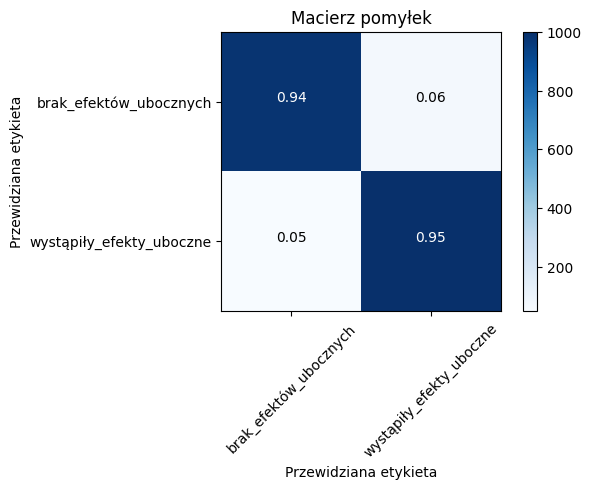

In [31]:
# Etykiety do wykorzystania na osiach wykresu macierzy pomyłek
cm_plot_labels = ['brak_efektów_ubocznych', 'wystąpiły_efekty_uboczne']
# Wywołanie funkcji do rysowania macierzy pomyłek z odpowiednimi parametrami
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, normalize=True, title='Macierz pomyłek')